Loading and preprocessing training data...
Loading and preprocessing validation data...
Loading and preprocessing test data...
Training data shape: (3584, 83, 1), Labels shape: (3584, 3)
Validation data shape: (768, 83, 1), Labels shape: (768, 3)
Test data shape: (768, 83, 1), Labels shape: (768, 3)
Number of classes: 3
Class boundaries (quantiles): [1018.     3811.8526]
Class names: ['high' 'low' 'medium']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 83, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 83, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 83, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,147 (149.01 KB)

 Trainable params: 37,763 (147.51 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.3809 - loss: 1.4632 - val_accuracy: 0.4792 - val_loss: 1.0430
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.4439 - loss: 1.1859 - val_accuracy: 0.4714 - val_loss: 1.0336
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.4766 - loss: 1.0974 - val_accuracy: 0.4844 - val_loss: 1.0006
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.4588 - loss: 1.0839 - val_accuracy: 0.4727 - val_loss: 0.9944
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.5190 - loss: 0.9990 - val_accuracy: 0.5430 - val_loss: 0.9510
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.5609 - loss: 0.9377 - val_accuracy: 0.6107 - val_loss: 0.8304
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5827 - loss: 0.8964 - val_accuracy: 0.5833 - val_loss: 0.8868
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5904 - loss: 0.8811 - val_accuracy: 

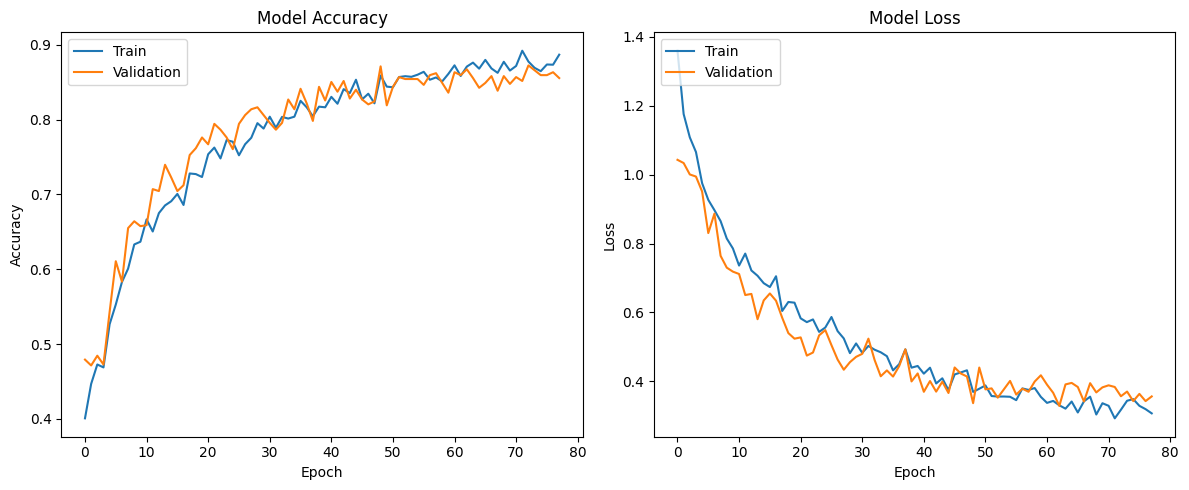

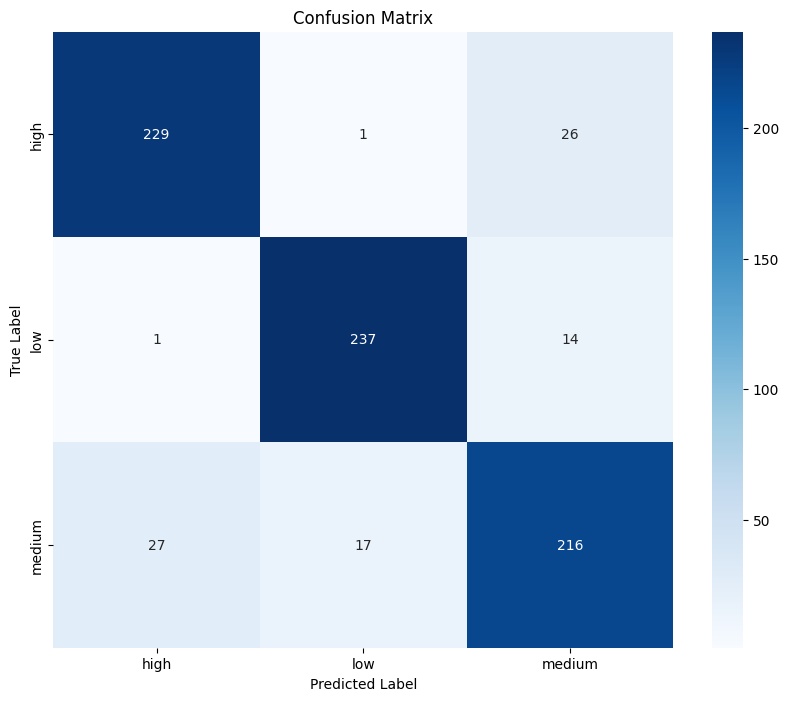


--- End of Script ---


In [1]:
# -*- coding: utf-8 -*-
# RNN for Crop Production Classification (3 Classes)

# This script demonstrates how to build and train a Recurrent Neural Network (RNN)
# for classifying crop production levels into 3 classes based on tabular data using TensorFlow/Keras.

## 1. Setup and Imports

# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths for session upload
TRAIN_PATH = "train.csv"
VALID_PATH = "validation.csv"
TEST_PATH = "test.csv"

## 2. Load and Preprocess Data

def load_and_preprocess(file_path, scaler=None, fit_scaler=False, label_encoder=None, fit_encoder=False):
    """Loads data, preprocesses features, and converts target to 3 classes."""
    df = pd.read_csv(file_path)

    # Define class boundaries based on quantiles for 3 classes
    # Using 33rd and 66th percentiles for even distribution
    if fit_scaler:  # Only compute quantiles on training data
        quantiles = np.quantile(df["Production (M.Ton)"], [0.33, 0.66])
        feature_scaler = StandardScaler()
    else:
        # These will be provided from training data
        if scaler is None:
            raise ValueError("Scaler must be provided if fit_scaler is False")
        quantiles, feature_scaler = scaler  # Unpack the tuple of (quantiles, feature_scaler)

    # Create class labels based on quantiles
    bins = [-np.inf, quantiles[0], quantiles[1], np.inf]
    labels = ["low", "medium", "high"]

    # Convert target variable to classes
    df["Production_Category"] = pd.cut(df["Production (M.Ton)"], bins=bins, labels=labels, right=True)

    # Separate features and target
    X = df.drop(["Production (M.Ton)", "Production_Category"], axis=1)
    y = df["Production_Category"]

    # Identify numerical features (excluding one-hot encoded Crop and District)
    # Assuming columns starting with 'Crop_' or 'District_' are one-hot encoded
    numerical_cols = [col for col in X.columns if not col.startswith("Crop_") and not col.startswith("District_")]

    # Scale numerical features
    if fit_scaler:
        X[numerical_cols] = feature_scaler.fit_transform(X[numerical_cols])
    else:
        X[numerical_cols] = feature_scaler.transform(X[numerical_cols])

    # Encode labels
    if fit_encoder:
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
    else:
        if label_encoder is None:
            raise ValueError("LabelEncoder must be provided if fit_encoder is False")
        y_encoded = label_encoder.transform(y)

    # Convert labels to one-hot encoding
    y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=len(labels))

    # For RNN, reshape features to sequence format: (samples, timesteps, features)
    # We'll treat each feature as a timestep in a sequence
    X_reshaped = X.values.reshape((X.shape[0], X.shape[1], 1))

    if fit_scaler and fit_encoder:
        return X_reshaped, y_one_hot, (quantiles, feature_scaler), le
    elif fit_scaler:
         return X_reshaped, y_one_hot, (quantiles, feature_scaler)
    elif fit_encoder:
        return X_reshaped, y_one_hot, label_encoder
    else:
        return X_reshaped, y_one_hot

# Load and preprocess data
print("Loading and preprocessing training data...")
X_train, y_train, scalers, label_encoder = load_and_preprocess(TRAIN_PATH, fit_scaler=True, fit_encoder=True)

print("Loading and preprocessing validation data...")
X_val, y_val = load_and_preprocess(VALID_PATH, scaler=scalers, label_encoder=label_encoder)

print("Loading and preprocessing test data...")
X_test, y_test = load_and_preprocess(TEST_PATH, scaler=scalers, label_encoder=label_encoder)

quantiles, feature_scaler = scalers

print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels shape: {y_val.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")
print(f"Number of classes: {y_train.shape[1]}")
print(f"Class boundaries (quantiles): {quantiles}")
print(f"Class names: {label_encoder.classes_}")

## 3. Build the RNN Model

def build_rnn_model(input_shape, num_classes):
    """Builds the RNN model for tabular data classification."""
    model = keras.Sequential([
        # Input layer
        keras.Input(shape=input_shape),

        # RNN layers
        layers.SimpleRNN(64, return_sequences=True),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.SimpleRNN(128),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Dense layers for classification
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Get input shape and number of classes from preprocessed data
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
num_classes = y_train.shape[1]  # 3 classes

# Build the model
model = build_rnn_model(input_shape, num_classes)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Print model summary
model.summary()

## 4. Train the Model

# Define training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Add Early Stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

## 5. Evaluate the Model

# Get best validation accuracy from history
if 'val_accuracy' in history.history:
    best_val_accuracy = max(history.history['val_accuracy'])
    print(f"\nBest Validation Accuracy: {best_val_accuracy:.4f}")
else:
    print("\nValidation accuracy not available in history.")

# Evaluate the trained model on the test dataset
print("\nEvaluating model on test data...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Generate predictions
print("\nGenerating predictions on test data...")
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert one-hot encoded y_test back to single labels for comparison
y_test_labels = np.argmax(y_test, axis=1)

# Print Classification Report (includes Recall and F1-score per class, and macro/weighted averages)
print("\nClassification Report (includes Recall and F1-score):")
print(classification_report(y_test_labels, y_pred,
                           target_names=label_encoder.classes_,
                           zero_division=0))  # Fix for warnings

# Calculate and print Macro F1 Score separately
macro_f1 = f1_score(y_test_labels, y_pred, average='macro', zero_division=0)
print(f"\nMacro F1 Score (Test Set): {macro_f1:.4f}")

# Print Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_labels, y_pred)
print(cm)

## 6. Visualize Results

# Plot training history and confusion matrix

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
if 'val_accuracy' in history.history:
    plt.plot(history.history["val_accuracy"])
    plt.legend(["Train", "Validation"], loc="upper left")
else:
    plt.legend(["Train"], loc="upper left")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
if 'val_loss' in history.history:
    plt.plot(history.history["val_loss"])
    plt.legend(["Train", "Validation"], loc="upper left")
else:
    plt.legend(["Train"], loc="upper left")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.tight_layout()
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print("\n--- End of Script ---")
